In [425]:
import pandas as pd
import numpy as np
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
import warnings
warnings.simplefilter('ignore')
%pylab inline
%config InlineBackend.figure_format = 'svg' 
from pylab import rcParams
rcParams['figure.figsize'] = 15,3

Populating the interactive namespace from numpy and matplotlib


In [426]:
stats = pd.read_csv('Seasons_Stats.csv')
players = pd.read_csv('Players.csv')

In [429]:
common = pd.merge(
    players,
    stats,
    how='left',
    on='Player')

In [431]:
position_scored = common[[ 'Pos', 'PTS']].groupby('Pos').sum().sort_values('PTS', ascending=False).reset_index()
position_scored.head(2)

,Pos,PTS
0,SG,2707137.0
1,SF,2648150.0


In [432]:
height_PTS = common[[ 'height', 'Pos', 'PTS']].groupby('height').sum().sort_values('PTS', ascending=False).reset_index()
height_PTS.head(2)

,height,PTS
0,201.0,1439410.0
1,206.0,1430734.0


In [433]:
Pos_height = common[[ 'Pos', 'height']].groupby('Pos').mean().sort_values('height', ascending=False).reset_index()
Pos_height

,Pos,height
0,C,209.915108
1,PF-C,207.666667
2,C-PF,206.727273
3,PF,204.611357
4,C-SF,204.500000
5,SF-PF,203.238095
6,C-F,203.028571
7,PG-SF,203.000000
8,PF-SF,202.000000
9,SF,200.299851


In [434]:
val_cou_pos = common['Pos'].value_counts().reset_index(inplace=False)
val_cou_pos.columns = [ 'Pos', 'Quant']
val_cou_pos

,Pos,Quant
0,PF,4966
1,SG,4811
2,C,4759
3,SF,4699
4,PG,4648
5,G,139
6,F,123
7,F-C,81
8,G-F,79
9,F-G,60


In [435]:
Pl_PTS_3P_2P = common[[ 'Player', 'PTS', '3P', '2P']].groupby('Player').sum().sort_values('PTS', ascending=False).reset_index()
Pl_PTS_3P_2P

,Player,PTS,3P,2P
0,Kareem Abdul-Jabbar*,38387.0,1.0,15836.0
1,Karl Malone*,36928.0,85.0,13443.0
2,Wilt Chamberlain*,33953.0,0.0,13744.0
3,Kobe Bryant,33643.0,1827.0,9892.0
4,Michael Jordan*,32292.0,581.0,11611.0
5,Eddie Johnson,31852.0,783.0,11946.0
6,Dirk Nowitzki,30260.0,1780.0,8908.0
7,Shaquille O'Neal*,29428.0,1.0,11660.0
8,LeBron James,28787.0,1467.0,8956.0
9,Dominique Wilkins*,28591.0,796.0,9865.0


In [436]:
Pl_PTS_3P_2P = common[[ 'Player', 'PTS', '3P', '2P']].groupby('Player').sum().sort_values('3P', ascending=False).reset_index()
Pl_PTS_3P_2P

,Player,PTS,3P,2P
0,Ray Allen,26218.0,3174.0,5991.0
1,Reggie Miller*,25279.0,2560.0,5681.0
2,Kyle Korver,11713.0,2322.0,1726.0
3,Vince Carter,27463.0,2292.0,7669.0
4,Tim Hardaway,20339.0,2251.0,5136.0
5,Chauncey Billups,19303.0,2245.0,3522.0
6,Jason Terry,18715.0,2242.0,4613.0
7,Jamal Crawford,19364.0,2191.0,4496.0
8,Jason Kidd,18992.0,2168.0,4569.0
9,Paul Pierce,26397.0,2143.0,6525.0


In [437]:
qqq = pd.merge(
    Pos_height,
    val_cou_pos,
    how='left',
    on='Pos')

In [440]:
col_Pl = common[['collage', 'PTS']].groupby('collage').sum().sort_values('PTS', ascending=False)
col_Pl

,PTS
collage,
"University of California, Los Angeles",405052.0
University of North Carolina,353105.0
University of Kentucky,289294.0
Duke University,211312.0
University of Kansas,205645.0
University of Michigan,201482.0
Indiana University,181558.0
Ohio State University,176669.0
University of Arizona,171943.0


In [441]:
years_df = common.groupby('collage')[['PTS']].sum().join(
    common.groupby('collage')[['Player']].count()
)
years_df.columns = [ 'PTS', 'Number_of_players']
a = years_df.reset_index()
a

,collage,PTS,Number_of_players
0,Acadia University,28.0,1
1,Alabama A&M University,112.0,3
2,Alabama State University,923.0,5
3,Albany State University,11573.0,45
4,Alcorn State University,11331.0,30
5,Alliance College,5.0,1
6,American International College,6502.0,13
7,American University,5330.0,12
8,Appalachian State University,2336.0,5
9,Arizona State University,86259.0,161


In [454]:
years_df1 = a[['collage', 'PTS', 'Number_of_players']].groupby('collage').sum().sort_values('PTS', ascending=False)
years_df1.reset_index()

,collage,PTS,Number_of_players
0,"University of California, Los Angeles",405052.0,627
1,University of North Carolina,353105.0,556
2,University of Kentucky,289294.0,533
3,Duke University,211312.0,354
4,University of Kansas,205645.0,410
5,University of Michigan,201482.0,316
6,Indiana University,181558.0,310
7,Ohio State University,176669.0,265
8,University of Arizona,171943.0,324
9,Michigan State University,167036.0,315


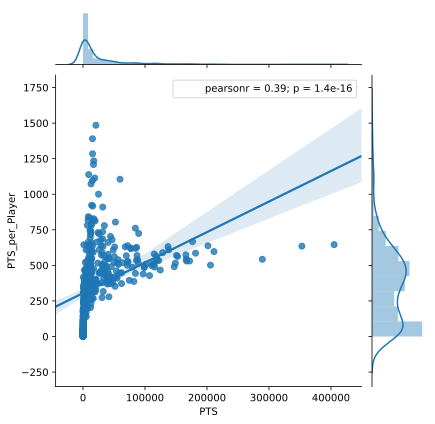

In [463]:
sns.jointplot(x='PTS', y='PTS_per_Player', 
              data=years_df1, kind='reg');

In [496]:
years_df1['PTS_per_Player'] = years_df1['PTS']/years_df1['Number_of_players']
years_df1.reset_index()

,collage,PTS,Number_of_players,PTS_per_Player
0,"University of California, Los Angeles",405052.0,627,646.015949
1,University of North Carolina,353105.0,556,635.080935
2,University of Kentucky,289294.0,533,542.765478
3,Duke University,211312.0,354,596.926554
4,University of Kansas,205645.0,410,501.573171
5,University of Michigan,201482.0,316,637.601266
6,Indiana University,181558.0,310,585.670968
7,Ohio State University,176669.0,265,666.675472
8,University of Arizona,171943.0,324,530.688272
9,Michigan State University,167036.0,315,530.273016


In [499]:
years_df1.reset_index()[['collage', 'PTS_per_Player']].sort_values('PTS_per_Player', ascending=False).style.bar()

,collage,PTS_per_Player
127,United States Naval Academy,1485
150,Gardner-Webb University,1390.09
148,North Carolina Central University,1284.25
139,Illinois Wesleyan University,1234.79
142,State University of New York College at Buffalo,1208.93
203,Prairie View A&M University,1138.38
134,University of Central Arkansas,1114.12
57,Louisiana Tech University,1105.44
149,Trinity Valley Community College,1096.21
170,Marist College,1072.58


In [378]:
years_df1[['collage', 'PTS_per_Player']].sort_values('PTS_per_Player', ascending=False).reset_index()

,index,collage,PTS_per_Player
0,229,United States Naval Academy,1485.000000
1,253,Gardner-Webb University,1390.090909
2,246,North Carolina Central University,1284.250000
3,227,Illinois Wesleyan University,1234.785714
4,230,State University of New York College at Buffalo,1208.928571
5,271,Prairie View A&M University,1138.375000
6,217,University of Central Arkansas,1114.117647
7,119,Louisiana Tech University,1105.444444
8,231,Trinity Valley Community College,1096.214286
9,249,Marist College,1072.583333


In [486]:
years_df2 = common[['Year', '3P', '2P', 'FT', 'G']].groupby('Year').sum()
kkkk = years_df2.reset_index()

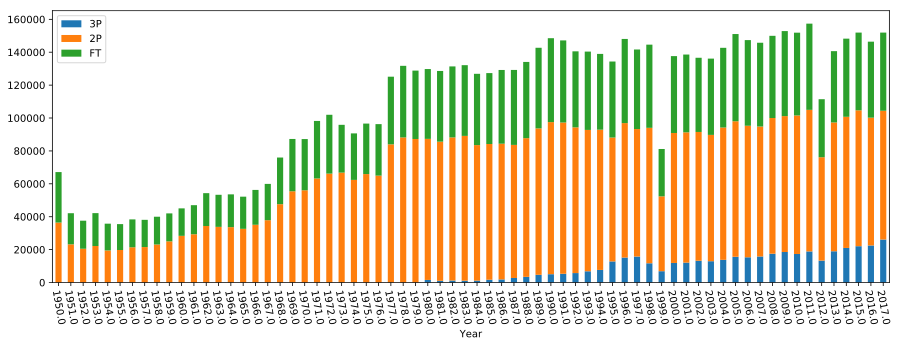

In [447]:
years_df2.plot(kind='bar', rot=1000, stacked=True);

In [491]:
trace0 = go.Scatter(
    x=kkkk.Year,
    y=kkkk.G,
    name='Games'
)

trace1 = go.Scatter(
    x=kkkk.Year,
    y=kkkk.FT,
    name='Penalties'
)

data = [trace0, trace1]
layout = {'title': 'Statistics of games and penalties'}

fig = go.Figure(data=data, layout=layout)

iplot(fig) #, show_link=False)

In [500]:
trace0 = go.Scatter(
    x=qqq.Pos,
    y=qqq.height,
    mode = 'markers+text',
    text = qqq.Quant,
    textposition='bottom'
)

data = [trace0]
layout = {'title': 'Отношение роста к позиции игрока и количество таких игроков'}

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link=False)